### Initialization

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('d7.csv')

In [3]:
# rename fields

df = df.rename(columns={
    "Rainfall_mm": "rainfall",
    "Temperature_Celsius": "temperature",
    "Yield_tons_per_hectare": "yield",
    "Fertilizer_Used": "fertilizer",
    "Irrigation_Used": "irrigation",
    "Season": "season",
    "Soil_Type": "soil",
    "State_Name": "state",
    "Weather_Condition": "weather",
})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        2351 non-null   object 
 1   season       2351 non-null   object 
 2   yield        2351 non-null   float64
 3   soil         2351 non-null   object 
 4   temperature  2351 non-null   float64
 5   fertilizer   2351 non-null   bool   
 6   irrigation   2351 non-null   bool   
 7   weather      2351 non-null   object 
 8   rainfall     2351 non-null   float64
dtypes: bool(2), float64(3), object(4)
memory usage: 133.3+ KB


### Data Visualization

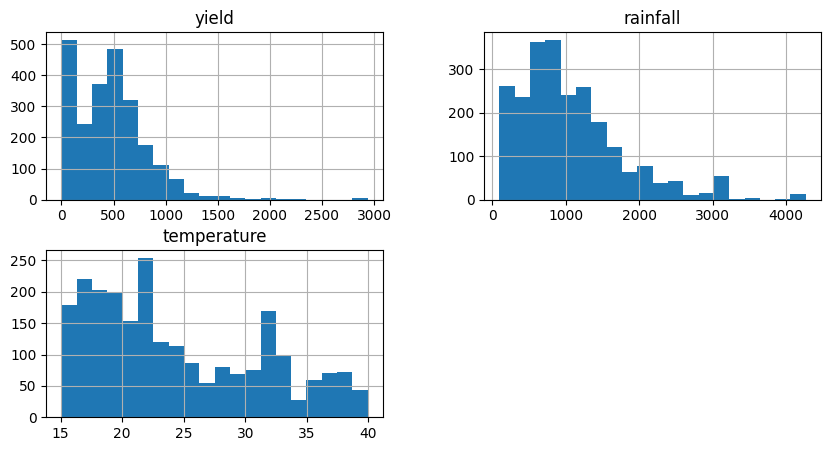

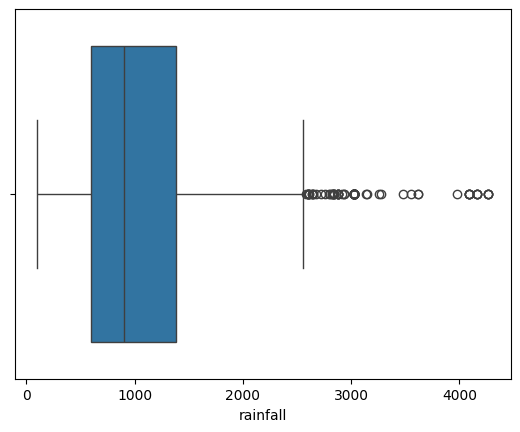

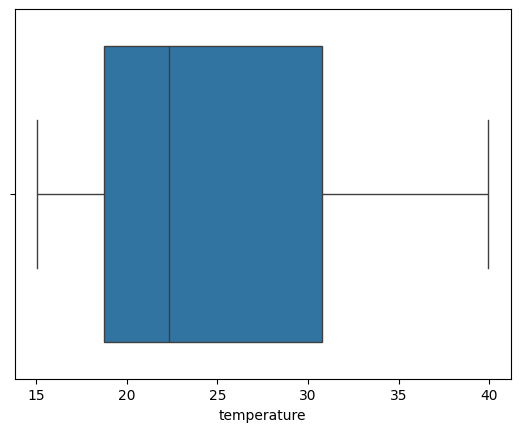

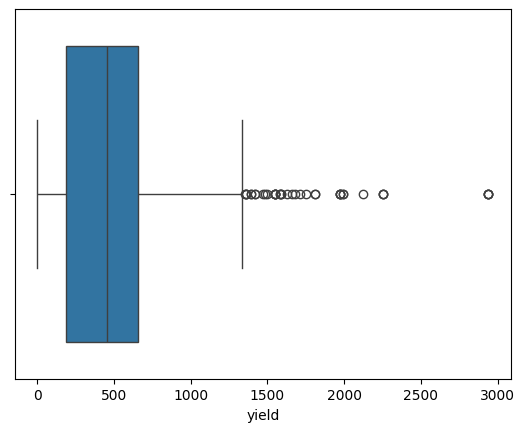

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# histogram
df[['yield', 'rainfall', 'temperature']].hist(figsize=(10, 5), bins=20)
plt.savefig('yhist.png', dpi=300, bbox_inches='tight')

plt.show()

# box plot
sns.boxplot(x=df["rainfall"])

plt.show()

sns.boxplot(x=df["temperature"])
plt.savefig('temperature_boxplot.png', dpi=300, bbox_inches='tight')

plt.show()

sns.boxplot(x=df["yield"])

plt.show()


### Removing Outliers

Outliers can be removed using the 1.5xIQR (InterQuartile Range).

For rainfall

In [ ]:
Q1 = df["rainfall"].quantile(0.25)
Q3 = df["rainfall"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df.loc[
    ((df["rainfall"] >= lower_bound) & (df["rainfall"] <= upper_bound))
]

print(df.shape)

(2246, 9)


For yield

In [ ]:
Q1 = df["yield"].quantile(0.25)
Q3 = df["yield"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df.loc[
    ((df["yield"] >= lower_bound) & (df["yield"] <= upper_bound))
]

print(df.shape)

(2202, 9)


### Encoding categorical features

These include soil, state, district, weather, season, fertilizer and irrigation

one-hot encoding for categorical data.

1.   soil
2.   state
3.   weather
4.   season


In [4]:
df = pd.get_dummies(df, columns=["soil", "state", "weather", "season"], drop_first=True)

Label encoding for ordinal data

1.   fertilizer
2.   irrigation



In [5]:
df["fertilizer"] = df["fertilizer"].astype(int)
df["irrigation"] = df["irrigation"].astype(int)

In [6]:
df.head(100)

,yield,temperature,fertilizer,irrigation,rainfall,soil_Clay,soil_Loam,soil_Peaty,soil_Sandy,soil_Silt,...,state_Tamil Nadu,state_Telangana,state_Tripura,state_Uttar Pradesh,state_West Bengal,weather_Rainy,weather_Sunny,season_Rabi,season_Summer,season_Whole Year
0,329.521784,17.378018,0,0,1405.845548,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,397.801073,17.184183,0,0,618.002969,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,605.607603,31.244013,0,0,646.076206,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,605.607603,23.797715,0,0,1200.695618,False,False,False,False,True,...,False,False,False,False,False,True,False,True,False,False
4,415.613061,17.681887,0,0,688.644478,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,985.596688,21.342620,0,0,1226.504825,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
96,985.596688,21.342620,0,0,1226.504825,False,False,False,False,True,...,False,False,False,False,False,True,False,True,False,False
97,1044.969982,27.898690,0,0,774.006065,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
98,1044.969982,27.898690,0,0,774.006065,False,False,False,True,False,...,False,False,False,False,False,False,True,True,False,False


### Min-Max Normalization for numerical features

These include yield and temperature.
Min-Max normalization is selected as most of the outliers are removed.

Min-Max scaling:-

a = (A - Amin) / (Amax - Amin)

A = a * (Amax - Amin) + Amin

In [8]:
df[["rainfall", "temperature", "yield"]].describe()

,rainfall,temperature,yield
count,2351.000000,2351.000000,2351.000000
mean,6.737108,24.453335,5.640858
std,0.735480,6.847277,1.362544
min,4.626344,15.070392,0.000000
25%,6.386301,18.725100,5.241747
50%,6.805411,22.312500,6.120363
75%,7.232709,30.765677,6.485599
max,8.358903,39.946767,7.986448


In [8]:
features = ["rainfall", "yield"]

for feature in features:
  f_min = df[feature].min()
  f_max = df[feature].max()

  print(f"{feature=} {f_min=}, {f_max=}")

  df[feature] = (df[feature] - f_min) / (f_max - f_min)


feature='rainfall' f_min=4.626343793411346, f_max=8.358903359291658
feature='yield' f_min=0.0, f_max=7.986448277905101


### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['rainfall', 'temperature', 'yield']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

### Robust Scaling for rainfall

As it can be observed from the histogram, the data is right skewed and it also contains some outliers. Hence it is beneficial to apply robust scaling.

a = (A - median) / IQR

A = a * IQR + median


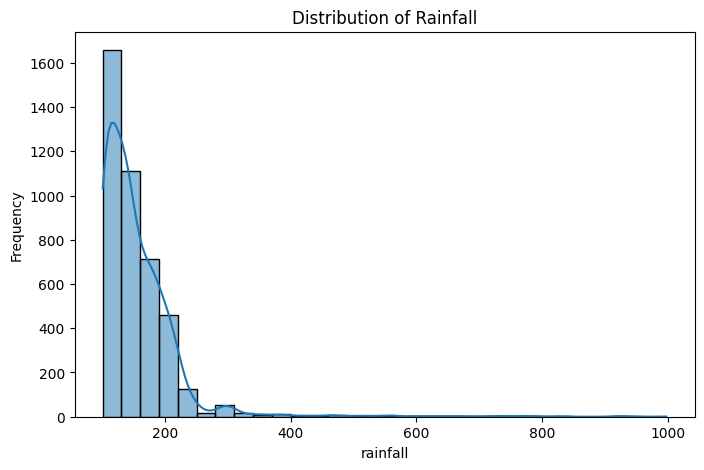

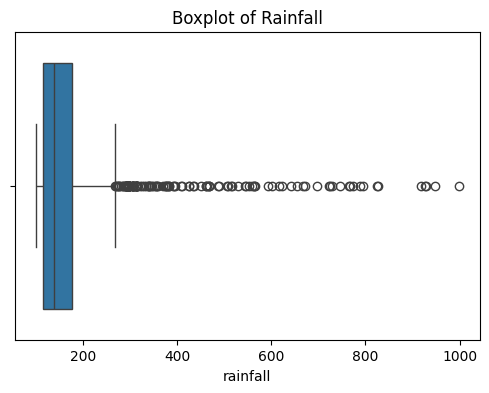

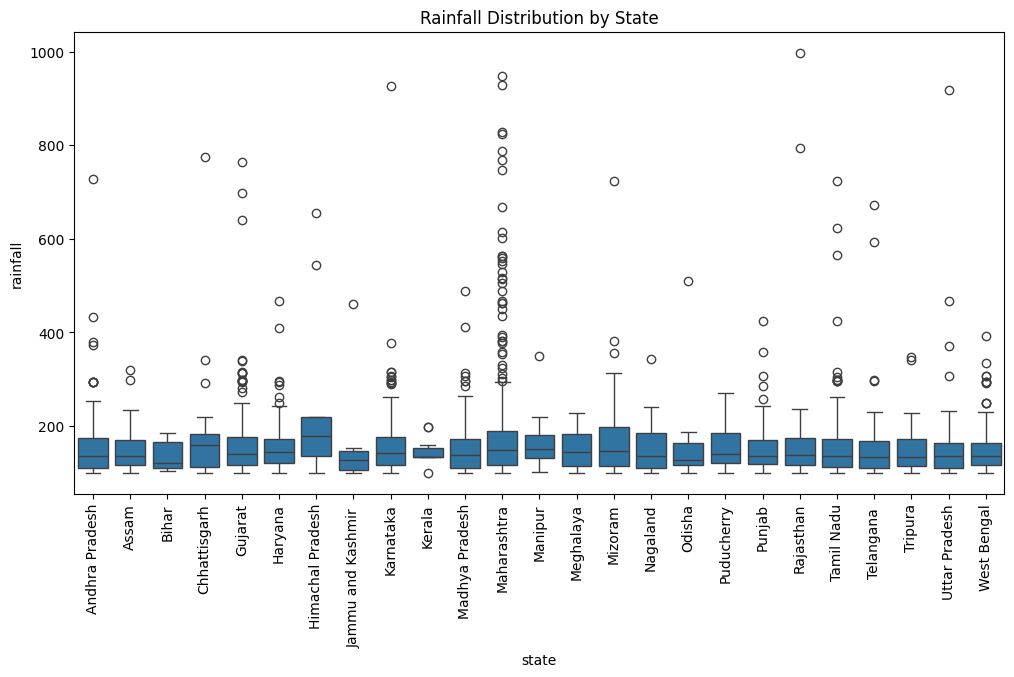

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["rainfall"], bins=30, kde=True)
plt.xlabel("rainfall")
plt.ylabel("Frequency")
plt.title("Distribution of Rainfall")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df["rainfall"])
plt.title("Boxplot of Rainfall")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x=df["state"], y=df["rainfall"])
plt.xticks(rotation=90)
plt.title("Rainfall Distribution by State")
plt.show()

Actual scaling

In [ ]:
median = df["rainfall"].quantile(0.50)

print(f"{median=}")

Q1 = df["rainfall"].quantile(0.25)
Q3 = df["rainfall"].quantile(0.75)

IQR = Q3 = Q1

print(f"{IQR=}")

df["rainfall"] = (df["rainfall"] - median) / IQR

median=np.float64(138.11536421778612)
IQR=np.float64(114.79121183123962)


In [ ]:
df.head(200)

,state,season,yield,soil,rainfall,temperature,fertilizer,irrigation,weather
0,Andhra Pradesh,Kharif,0.122,Silt,-0.005575,21.440610,0,0,Cloudy
1,Andhra Pradesh,Kharif,0.147,Chalky,-0.049217,28.765224,0,0,Cloudy
2,Andhra Pradesh,Kharif,0.116,Loam,0.070516,35.857178,0,0,Sunny
3,Andhra Pradesh,Kharif,0.111,Sandy,0.847257,17.378018,0,0,Cloudy
4,Andhra Pradesh,Kharif,0.115,Silt,0.441632,36.286696,0,0,Cloudy
...,...,...,...,...,...,...,...,...,...
195,Assam,Kharif,0.054,Loam,-0.136852,18.641843,0,0,Cloudy
196,Assam,Kharif,0.048,Silt,-0.271681,18.168842,0,0,Rainy
197,Assam,Kharif,0.048,Silt,0.274569,21.771892,0,0,Sunny
198,Assam,Kharif,0.048,Silt,-0.271681,18.168842,0,0,Rainy


### Log Transform + Min-Max Scaling

bcoz the above 2 aren't working

In [7]:
features = ["rainfall", "yield"]

for feature in features:
  df[feature] = np.log1p(df[feature])

**Run the min-max scaling tab after this**

### Z-Scaling for Temperature

z-scaling is used for temperature due to its uniformity

a = (A - Amean) / Astd     
A = a * Astd + Amean

In [9]:
mean = df["temperature"].mean()
std = df["temperature"].std()

print(f"{mean=}")
print(f"{std=}")

df["temperature"] = (df["temperature"] - mean) / std


mean=24.453335060827776
std=6.847276919397972


### Splitting the model into training and testing

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["yield"])
y = df["yield"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, shuffle=True)

print(X_test.shape, X_train.shape)

(471, 38) (1880, 38)


### Building and compiling the model

In [ ]:
import keras
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# model = keras.Sequential([
#     layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
#     layers.Dense(32, activation="relu"),
#     layers.Dense(1)
# ])

model = keras.Sequential([
      Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
      BatchNormalization(),
      Dense(32, activation='relu',),
      Dense(1, activation='linear')
  ])

lr = False
rf = True

if lr == True:
  model = keras.Sequential([
    Dense(1, input_shape=(X_train.shape[1],), activation=None)  # No hidden layers
  ])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='huber', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,           # More trees = better performance, to a point
    max_depth=20,               # Limit depth to avoid overfitting
    min_samples_split=4,        # Minimum samples to split a node
    min_samples_leaf=2,         # Minimum samples in leaf node
    max_features='sqrt',        # Use square root of features at each split
    bootstrap=True,             # Use bootstrap samples
    random_state=42,            # For reproducibility
    n_jobs=-1                   # Use all CPU cores
)

In [30]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [31]:
import joblib
joblib.dump(model, 'rf_model.pkl')

['rf_model.pkl']

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=24)
model.fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error


pred = model.predict(X_test)

print(mean_absolute_error(pred, y_test))


520.4935314036948


['random_forest.pkl']

### Training the model

Early stopping is used so that the model stops training when there is no significant reduction in loss.

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7)
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2, callbacks=[early_stop, reduce_lr])

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

In [ ]:
model.summary()
print(X_train.shape[1])

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

In [37]:
import joblib
joblib.dump(X.columns.tolist(), "columns.pkl")

['columns.pkl']

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Get predictions
y_pred = model.predict(X_test).flatten()

# 2. Standard Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mean_yield = np.mean(y_test)

# 3. NRMSE: Normalized RMSE as % of mean
nrmse = (rmse / mean_yield) * 100

# 4. Print clean output
print(f"MAE         : {mae:.4f}")
print(f"RMSE        : {rmse:.4f}")
print(f"Mean Yield  : {mean_yield:.4f}")
print(f"NRMSE (%)   : {nrmse:.2f}%")

# 5. Optional: Show prediction vs actual
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

print("\nSample prediction comparison:")
print(comparison_df.head(10))

# import tensorflow as tf

# # Convert to TFLite
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# # Save the TFLite model
# with open("linear_regression.tflite", "wb") as f:
#     f.write(tflite_model)


MAE         : 0.0412
RMSE        : 0.0635
Mean Yield  : 0.7062
NRMSE (%)   : 8.99%

Sample prediction comparison:
     Actual  Predicted
0  0.805639   0.790555
1  0.621408   0.641658
2  0.831933   0.806384
3  0.708216   0.733983
4  0.622281   0.639345
5  0.811898   0.772586
6  0.728544   0.767057
7  0.868505   0.800311
8  0.676800   0.835483
9  0.771838   0.762303


In [ ]:
from tensorflow.keras.utils import plot_model
from PIL import Image

# Assuming `model` is your Keras model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
img = Image.open("model.png")
img = img.resize((500, 300))  # width, height
img.save("nn.png")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Train Random Forest
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=24,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# 2. Standard Metrics
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mean_yield = np.mean(y_test)

# 3. NRMSE: Normalized RMSE as % of mean
nrmse = (rmse / mean_yield) * 100

# 4. Print clean output
print(f"MAE         : {mae:.4f}")
print(f"RMSE        : {rmse:.4f}")
print(f"Mean Yield  : {mean_yield:.4f}")
print(f"NRMSE (%)   : {nrmse:.2f}%")


import joblib
joblib.dump(rf, 'random_forest.pkl')

MAE         : 0.0385
RMSE        : 0.0673
Mean Yield  : 0.7859
NRMSE (%)   : 8.57%


['random_forest.pkl']

### Convert model to tflite

In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('neural_networks.tflite', 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpsydhvip2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 39), dtype=tf.float32, name='keras_tensor_224')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  138312216738128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138312053131024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138312089851024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138312089858320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138312089848336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138312089855632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138312089851408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138312089859088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138312052480848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138312052481616: TensorSpec(shape=(), dtype=tf.resource, name=None)


### Prediction

In [38]:
new_data = pd.DataFrame({
    "soil": ["Sandy"],
    "rainfall": [500],
    "temperature": [40],
    "fertilizer": [True],
    "irrigation": [False],
    "weather": ["Sunny"],
    "state": ["Punjab"],
    "season": ["Kharif"]
})

temp_mean = 26.862503513186738
temp_std = 7.217972550794356

rain_min = 4.61526343577011
rain_max = 6.658214751472548

new_data["rainfall"] = np.log1p(new_data["rainfall"])
new_data["rainfall"] = (new_data["rainfall"] - rain_min) / (rain_max - rain_min)
new_data["temperature"] = (new_data["temperature"] - temp_mean) / temp_std

new_data = pd.get_dummies(new_data, drop_first=True)

missing_cols = set(X_train.columns) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = 0

new_data = new_data[X_train.columns]
print(new_data)
input_array = new_data.astype(float).to_numpy().reshape(1, -1)

print(input_array)
prediction = model.predict(input_array)

yield_min = 0.36533731701738503
yield_max = 1.8711866028593769

predicted_yield = prediction * (yield_max - yield_min) + yield_min
predicted_yield = np.expm1(predicted_yield)
print(f"Predicted Yield: {predicted_yield[0][0]:.2f} tons/ha")

   temperature  fertilizer  irrigation  rainfall  soil_Clay  soil_Loam  \
0     1.820109        True       False  0.783838          0          0   

   soil_Peaty  soil_Sandy  soil_Silt  state_Assam  ...  state_Tamil Nadu  \
0           0           0          0            0  ...                 0   

   state_Telangana   state_Tripura  state_Uttar Pradesh  state_West Bengal  \
0                 0              0                    0                  0   

   weather_Rainy  weather_Sunny  season_Rabi         season_Summer       \
0              0              0                   0                   0   

   season_Whole Year   
0                   0  

[1 rows x 38 columns]
[[1.82010896 1.         0.         0.7838379  0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

/usr/lib64/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


IndexError: invalid index to scalar variable.